# problem statement 
Build a model which predicts sales basd on money spent on different platform marketting
predictor variable

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\sahil\Demo Datasets\advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


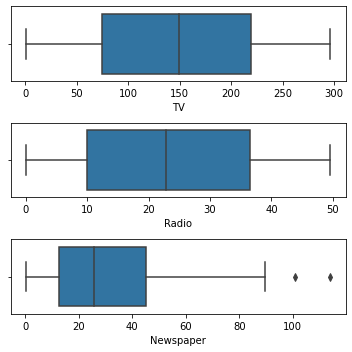

In [6]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(df['TV'],ax=axs[0])
plt2=sns.boxplot(df['Radio'],ax=axs[1])
plt3=sns.boxplot(df['Newspaper'],ax=axs[2])
plt.tight_layout()

<AxesSubplot:>

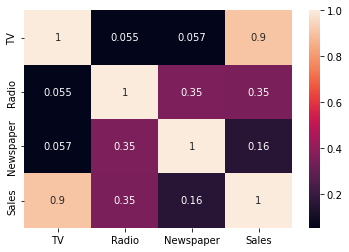

In [7]:
sns.heatmap(df.corr(),annot=True)

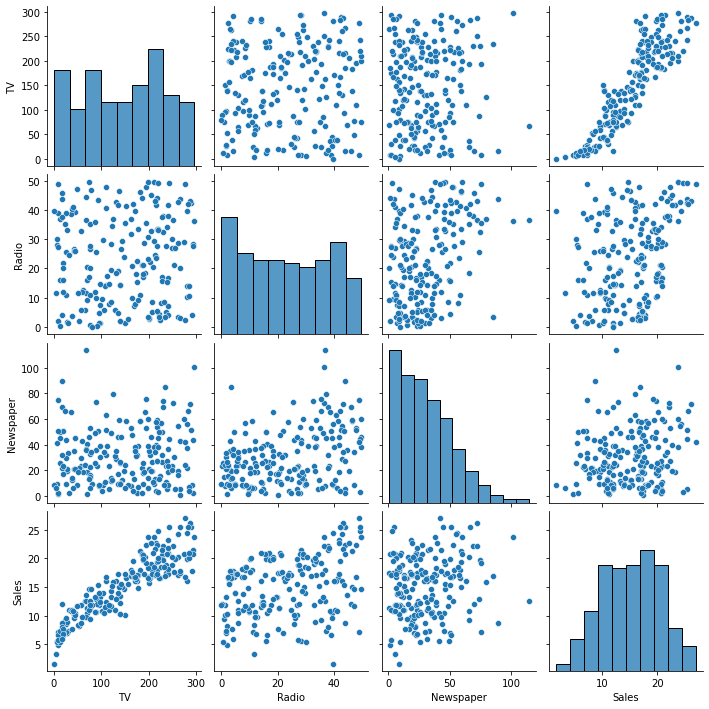

In [8]:
sns.pairplot(df)

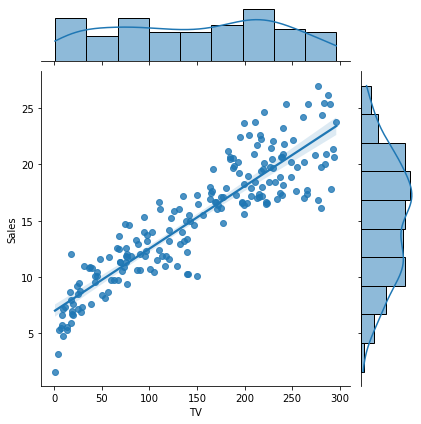

In [9]:
sns.jointplot(x='TV',y='Sales',data=df,kind='reg')

In [10]:
X=df['TV']#X always independent variable
y=df['Sales']#dependent variable

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [13]:
import statsmodels.api as sm

In [14]:
X_train_sm=sm.tools.tools.add_constant(X_train)

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
#deployment of SLR
lr=sm.OLS(y_train,X_train_sm).fit()

In [16]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

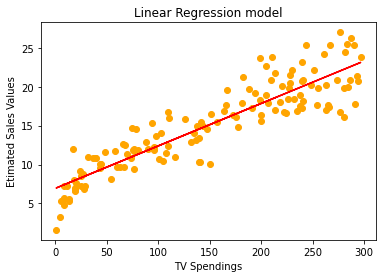

In [17]:
plt.scatter(X_train,y_train,color='orange')
plt.plot(X_train,6.948683+0.054546*X_train,'r')
plt.title("Linear Regression model")
plt.xlabel("TV Spendings")
plt.ylabel("Etimated Sales Values")
plt.show()

In [18]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           1.52e-52
Time:                        13:18:39   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lr.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,6.9487,0.385,18.068,0.000,6.188,7.709
TV,0.0545,0.002,24.722,0.000,0.050,0.059


In [20]:
lr.conf_int()

,0,1
const,6.188252,7.709114
TV,0.050183,0.058908


In [21]:
round(lr.rsquared*100,2)

81.58

In [22]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [23]:
lr.fittedvalues[0:5]#Estimated y(sales) values over real X(TV) values

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

In [24]:
lr.predict()[0:5]

array([18.58874687, 15.21236477, 18.13056255, 14.74327129, 14.27417782])

In [25]:
lr.predict([[1,180]])#180 :units sold: sales. 

array([16.76691872])

In [26]:
lr.predict([[1,200]])

array([17.85783378])

In [27]:
equation="Sales = " + str("%.5f" %lr.params[0]) + " + TV * " +str("%5f"%lr.params[1])

In [28]:
print(equation)

Sales = 6.94868 + TV * 0.054546
